# 連続の式 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def graph_func(df_continuityError, imin, imax, iposi,icol):
    plt.subplot(imin,imax,iposi)
    plt.plot(df_continuityError['time'],df_continuityError[icol],linestyle='solid',color='b',marker="o",label=icol)
    plt.xlabel('time')
    plt.ylabel(icol)
    plt.legend()
    plt.grid()

def df_continuityError_func(dir_):
    data_continuityError = np.loadtxt(f'./postProcessing/continuityError1/{dir_}/continuityError.dat')
    df_continuityError = pd.DataFrame(data_continuityError, columns=['time','Local','Global','Cumulative'])  
    return df_continuityError

def df_concat(dir_List):
    df = pd.DataFrame()
    for dir_ in dir_List:
        try:
            df_ = df_continuityError_func(dir_)
            df = pd.concat([df, df_])
        except Exception:
            print("Empty")
        
    return df

dir_List = os.listdir('./postProcessing/continuityError1')
df_continuityError = df_concat(dir_List)

plt.figure(figsize=(20,3))
graph_func(df_continuityError, 1,3,1,'Local')
graph_func(df_continuityError, 1,3,2,'Global')
graph_func(df_continuityError, 1,3,3,'Cumulative')

print('time : ',df_continuityError['time'].iloc[-1], 'continuityError : ', df_continuityError['Local'].iloc[-1])

df_continuityError.head()

NameError: name 'os' is not defined

# 残差

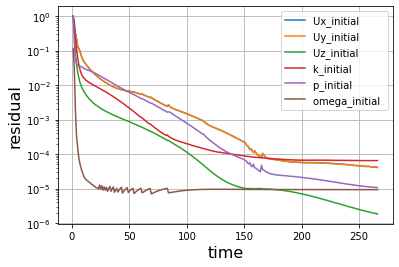

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os


def graph_layout():
    plt.grid()
    plt.legend(loc='best',bbox_to_anchor=(1, 1))
    plt.yscale('log')
    plt.xlabel('time', fontsize=16)
    plt.ylabel('residual', fontsize=16)

def df_residual_func(dir_):
    df_residual = pd.read_table(f'./postProcessing/residuals/{dir_}/solverInfo.dat',skiprows=1)
    df_residual = pd.DataFrame(df_residual)
    return df_residual

def df_concat(dir_List):
    df = pd.DataFrame()
    for dir_ in dir_List:
        try:
            df_ = df_residual_func(dir_)
            df = pd.concat([df, df_])
        except Exception:
            print("Empty")
        
    return df

dir_List = os.listdir('./postProcessing/residuals')
df_residual = df_concat(dir_List)

initial_residial = [data for data in df_residual.columns if "initial" in data]
final_residial = [data for data in df_residual.columns if "final" in data]
df_residual.plot(x="# Time        ",y=initial_residial, figsize=(6, 4))
graph_layout()
#df_residual.plot(x="# Time        ",y=final_residial)


# 体積流量

inlet_phi = -0.00072
outlet_phi = 0.00072


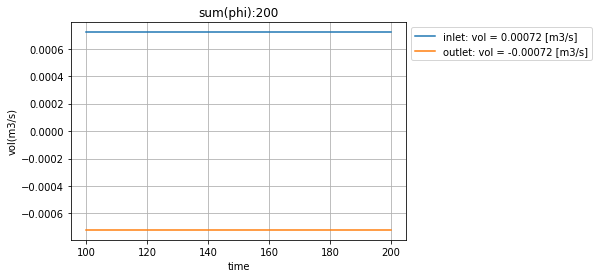

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def graph_surfaceField(df_phi, patchName):
    sum_phi = round(df_phi['sum(phi)'].iloc[-1],6)
    plt.plot(df_phi['# Time          '],df_phi['sum(phi)'],
            label=f'{patchName}: vol = {str(sum_phi)} [m3/s]')
    plt.xlabel('time')
    plt.ylabel('vol(m3/s)')
    plt.legend(loc='best',bbox_to_anchor=(1, 1))
    plt.title(f'sum(phi):{df_phi["# Time          "].iloc[-1]}')

def sum_phi_func(df_phi):
    sum_phi = round(df_phi['sum(phi)'].iloc[-1],6)
    return sum_phi

def df_phi_func(dir_, patchName):
    df_phi = pd.read_table(f'./postProcessing/{patchName}/{dir_}/surfaceFieldValue.dat',skiprows=4)
    df_phi = pd.DataFrame(df_phi)
    return df_phi

def df_concat(dir_List, patchName):
    df = pd.DataFrame()
    for dir_ in dir_List:
        try:
            df_ = df_phi_func(dir_, patchName)
            df = pd.concat([df, df_])
        except Exception:
            print("Empty")
        
    return df

surfaceField_list = ['inlet','outlet']

inlet_phi = 0
outlet_phi = 0
    
for patchName in surfaceField_list:
    dir_List = os.listdir(f'./postProcessing/{patchName}')
    df_phi = df_concat(dir_List, patchName)
    graph_surfaceField(df_phi, patchName)
    sum_phi = sum_phi_func(df_phi)
    if sum_phi <0:
        inlet_phi +=sum_phi

    else:
        outlet_phi +=sum_phi

print(f'inlet_phi = {inlet_phi}')
print(f'outlet_phi = {outlet_phi}')
df_concat


plt.grid()